# Task 5
### of Data Processing Software
### Student IAB-11
### Bovsunovska Mariia

First of all lets import libraries, that we'll need, and read data of United States from 1999 to 2008

In [72]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [73]:
df1 = pd.read_csv("summarySCC_PM25.csv")
df2 = pd.read_csv("Source_Classification_Code.csv")

C:\Users\1\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [74]:
print(list(df1.keys()))

['rownames', 'fips', 'SCC', 'Pollutant', 'Emissions', 'type', 'year']


In [75]:
df1['fips'] = df1['fips'].astype(str).str.replace('\s+', '')
for i in ['rownames', 'fips', 'SCC', 'Emissions', 'year']:
    df1[i] = pd.to_numeric(df1[i], errors='ignore')

C:\Users\1\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [76]:
print(df1.head(6))

   rownames  fips       SCC Pollutant  Emissions   type  year
0         4  9001  10100401  PM25-PRI     15.714  POINT  1999
1         8  9001  10100404  PM25-PRI    234.178  POINT  1999
2        12  9001  10100501  PM25-PRI      0.128  POINT  1999
3        16  9001  10200401  PM25-PRI      2.036  POINT  1999
4        20  9001  10200504  PM25-PRI      0.388  POINT  1999
5        24  9001  10200602  PM25-PRI      1.490  POINT  1999


In [77]:
print(df2.head(6))

   Unnamed: 0       SCC Data.Category  \
0           0  10100101         Point   
1           1  10100102         Point   
2           2  10100201         Point   
3           3  10100202         Point   
4           4  10100203         Point   
5           5  10100204         Point   

                                          Short.Name  \
0  Ext Comb /Electric Gen /Anthracite Coal /Pulve...   
1  Ext Comb /Electric Gen /Anthracite Coal /Trave...   
2  Ext Comb /Electric Gen /Bituminous Coal /Pulve...   
3  Ext Comb /Electric Gen /Bituminous Coal /Pulve...   
4  Ext Comb /Electric Gen /Bituminous Coal /Cyclo...   
5  Ext Comb /Electric Gen /Bituminous Coal /Sprea...   

                                EI.Sector Option.Group Option.Set  \
0  Fuel Comb - Electric Generation - Coal          NaN        NaN   
1  Fuel Comb - Electric Generation - Coal          NaN        NaN   
2  Fuel Comb - Electric Generation - Coal          NaN        NaN   
3  Fuel Comb - Electric Generation - Coal  

#### Questions
You must address the following questions and tasks in your exploratory analysis. For each
question/task you will need to make a single bar plot. You can use any plotting system in R
to make your plot.

1. Have total emissions from PM2.5 decreased in the United States from 1999 to 2008? Make a plot showing the total PM2.5 emission from all sources for each of the years 1999, 2002, 2005, and 2008.

<AxesSubplot:xlabel='year'>

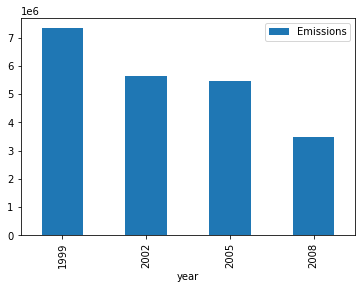

In [78]:
t1_group = df1.groupby("year", as_index=False).sum("Emissions")
t1_group.plot(x="year", y="Emissions", kind="bar")

2. Have total emissions from PM2.5 decreased in the Baltimore City, Maryland (fips == "24510") from 1999 to 2008?


<AxesSubplot:xlabel='year'>

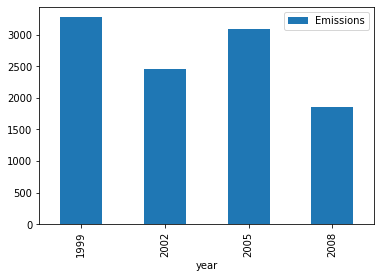

In [79]:
t2_group = df1[df1["fips"] == "24510"].groupby("year", as_index=False).sum("Emissions")

t2_group.plot(x="year", y="Emissions", kind="bar")

3. Of the four types of sources indicated by the type (point, nonpoint, onroad, nonroad) variable, which of these four sources have seen decreases in emissions from 1999–2008 for Baltimore City? Which have seen increases in emissions from 1999–2008?


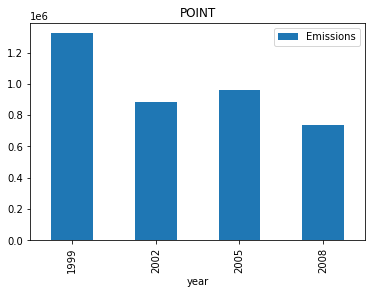

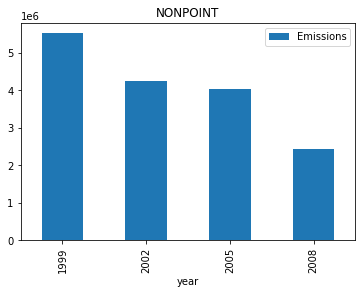

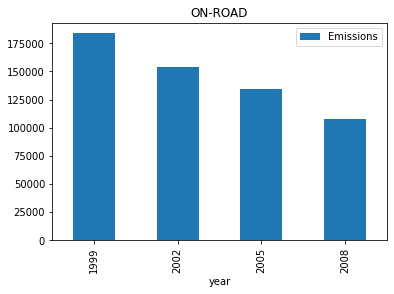

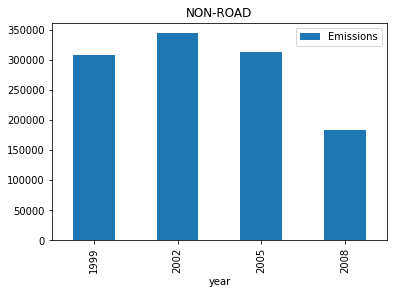

In [80]:
types = df1["type"].drop_duplicates().tolist()
for i, t in enumerate(types):
    df1[df1["type"] == t].groupby("year", as_index=False).sum("Emissions") \
        .plot(x="year", y="Emissions", kind="bar", title=t)

Actually all of them look decreased and none increased (even non-road type had something that seems to have stable trend, but not increased (if we'll count without last 2008 year)).

4. Across the United States, how have emissions from coal combustion-related sources changed from 1999–2008?


In [109]:
sources = [i for i in df2[["SCC", "EI.Sector"]].to_dict().values()]
sources = {sources[0][i]: sources[1][i] for i in range(len(sources[0]))}

df1_2 = df1.apply(lambda x: x.apply(lambda y: sources[str(y)]) if x.name == "SCC" else x)

<AxesSubplot:xlabel='year'>

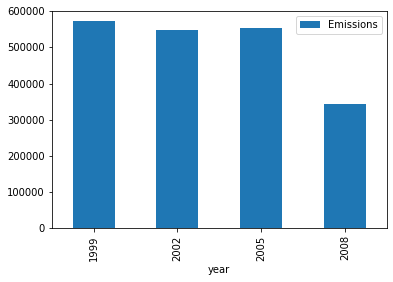

In [110]:
t4_coal = df1_2[df1_2["SCC"].str.contains("Coal")]
t4_group = t4_coal.groupby("year", as_index=False).sum("Emissions")
t4_group.plot(x="year", y="Emissions", kind="bar")

5. How have emissions from motor vehicle sources changed from 1999–2008 in Baltimore City (EI.Sector starts from “Mobile”)?


Baltimore City, Maryland (fips == "24510")

<AxesSubplot:xlabel='year'>

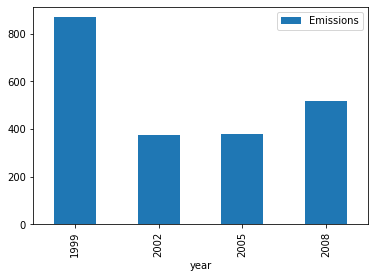

In [111]:
t5_filter = df1_2[(df1_2["SCC"].str.startswith("Mobile")) & (df1_2["fips"] == "24510")] 
t5_group = t5_filter.groupby("year", as_index=False).sum("Emissions")

t5_group.plot(x="year", y="Emissions", kind="bar")

6. Compare emissions from motor vehicle sources in Baltimore City with emissions from motor vehicle sources in Los Angeles County, California (fips == "06037"). Which city has seen greater changes over time in motor vehicle emissions?

<AxesSubplot:title={'center':'Los Angeles Country emissions'}, xlabel='year'>

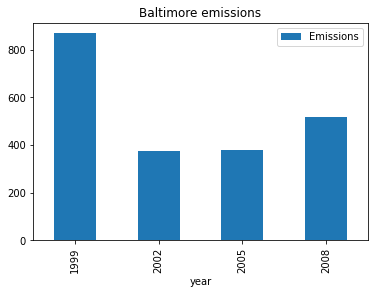

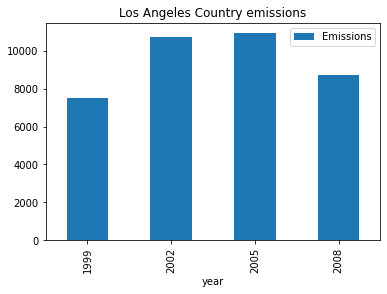

In [144]:
t6_filter = df1_2[(df1_2["SCC"].str.startswith("Mobile"))  & ((df1_2["fips"] == "6037") | (df1_2["fips"] == "06037"))]
t6_group = t6_filter.groupby("year", as_index=False).sum("Emissions")

t5_group.plot(x="year", y="Emissions", title="Baltimore emissions", kind="bar")
t6_group.plot(x="year", y="Emissions", title="Los Angeles Country emissions", kind="bar")


Los Angeles Country clearly has more population than Baltimore. We can see that because of amount of emissions. Also seems that LAC has stable emissions trens, while Baltimore had a lot of emissions, after that small amount, and nowadays seems, that it's growing again. But still it's not even near the amount of emissions of LAC, it's 15 times smaller.